<a href="https://colab.research.google.com/github/SABBIRAHAMMED3/ML/blob/main/FLOODROUTING_LSTM01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np

In [65]:
Data=pd.read_csv('/content/Data00-20.csv')

In [66]:
Data.head()

,Time and Date,U/S Stage,U/S Dis,D/S Stage,D/S Dis
0,31Dec2000 2400,22.81,115.05,22.81,115.05
1,01Jan2001 0600,22.62,114.80,22.62,198.10
2,01Jan2001 1200,22.62,114.55,22.62,107.19
3,01Jan2001 1800,22.62,114.31,22.62,114.56
4,01Jan2001 2400,22.62,114.06,22.62,114.08


In [67]:
Data.tail()

,Time and Date,U/S Stage,U/S Dis,D/S Stage,D/S Dis
27752,30Dec2019 2400,22.86,115.87,22.86,119.07
27753,31Dec2019 0600,22.86,115.73,22.86,115.63
27754,31Dec2019 1200,22.86,115.58,22.86,115.59
27755,31Dec2019 1800,22.86,115.44,22.86,115.44
27756,31Dec2019 2400,22.86,115.29,22.86,115.30


In [68]:
Data.shape

(27757, 5)

In [69]:
Data.dtypes

,0
Time and Date,object
U/S Stage,float64
U/S Dis,float64
D/S Stage,float64
D/S Dis,float64


In [70]:
Data['Time and Date']

,Time and Date
0,31Dec2000 2400
1,01Jan2001 0600
2,01Jan2001 1200
3,01Jan2001 1800
4,01Jan2001 2400
...,...
27752,30Dec2019 2400
27753,31Dec2019 0600
27754,31Dec2019 1200
27755,31Dec2019 1800


In [71]:
Data['Time and Date'] = Data['Time and Date'].str.replace(' 2400', ' 0000')
Data['Time and Date'] = pd.to_datetime(Data['Time and Date'], format='mixed', errors='coerce')

In [72]:
Data['Time and Date']

,Time and Date
0,2000-12-31 00:00:00
1,2001-01-01 06:00:00
2,2001-01-01 12:00:00
3,2001-01-01 18:00:00
4,2001-01-01 00:00:00
...,...
27752,2019-12-30 00:00:00
27753,2019-12-31 06:00:00
27754,2019-12-31 12:00:00
27755,2019-12-31 18:00:00


In [73]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27757 entries, 0 to 27756
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Time and Date  27757 non-null  datetime64[ns]
 1   U/S Stage      27757 non-null  float64       
 2   U/S Dis        27757 non-null  float64       
 3   D/S Stage      27757 non-null  float64       
 4   D/S Dis        27757 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.1 MB


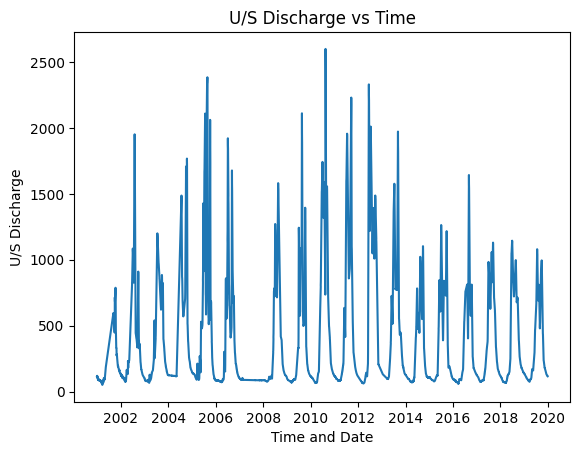

In [74]:
#Plot

import matplotlib.pyplot as plt

#Plot of Discharge vs Time

plt.plot(Data['Time and Date'], Data['U/S Dis'])
plt.xlabel('Time and Date')
plt.ylabel('U/S Discharge')
plt.title('U/S Discharge vs Time')
plt.show()

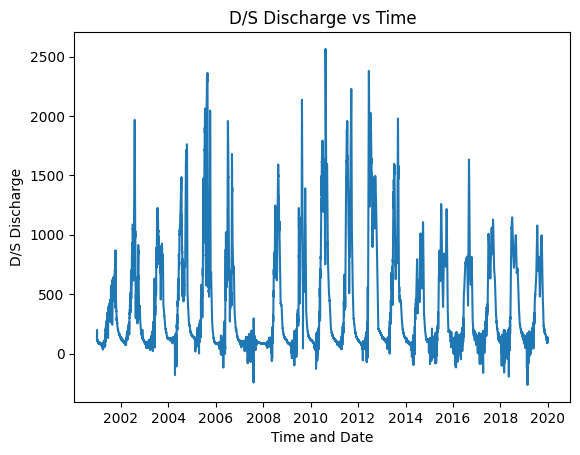

In [75]:
#Generated D/S Flood Hydrograph By HecRas 1D For Dharla River
#Given input U/S Discharge and D/S normal depth as Boundary Conditions

plt.plot(Data['Time and Date'], Data['D/S Dis'])
plt.xlabel('Time and Date')
plt.ylabel('D/S Discharge')
plt.title('D/S Discharge vs Time')
plt.show()

In [76]:
x=Data['U/S Dis'][10000:11000]
y=Data['D/S Dis'][10000:11000]

In [77]:
x.size

1000

In [78]:
#preparing data

US_Dis=x.values.reshape(x.size,1)
DS_Dis=y.values.reshape(y.size,1)

In [79]:
US_Dis.shape

(1000, 1)

In [80]:
US_Dis

array([[  85.15],
       [  85.15],
       [  85.14],
       [  85.14],
       [  85.14],
       [  85.13],
       [  85.13],
       [  85.13],
       [  85.12],
       [  85.12],
       [  85.12],
       [  85.11],
       [  85.11],
       [  85.11],
       [  85.11],
       [  85.1 ],
       [  85.1 ],
       [  85.1 ],
       [  85.09],
       [  85.09],
       [  85.09],
       [  85.08],
       [  85.08],
       [  85.08],
       [  85.07],
       [  85.07],
       [  85.07],
       [  85.06],
       [  85.06],
       [  85.06],
       [  85.06],
       [  85.05],
       [  85.05],
       [  85.05],
       [  85.04],
       [  85.04],
       [  85.04],
       [  85.03],
       [  85.03],
       [  85.03],
       [  85.02],
       [  85.02],
       [  85.02],
       [  85.01],
       [  85.01],
       [  85.01],
       [  85.01],
       [  85.  ],
       [  85.  ],
       [  85.  ],
       [  84.99],
       [  84.99],
       [  84.99],
       [  84.98],
       [  84.98],
       [  

In [81]:
#Generating HeatMap U/S_Dis vs D/S_Dis

#import seaborn as sns

#sns.heatmap(np.corrcoef(US_Dis, DS_Dis), annot=True, cmap='coolwarm')
#plt.xlabel('U/S Discharge')
#plt.ylabel('D/S Discharge')


In [85]:
# Corelation between U/S_Dis vs D/S_Dis
#np.corrcoef(US_Dis, DS_Dis)

In [86]:


# 3. Create rolling sequences for each column
def create_sequences_from_series(input_series, output_series, window):
    X, y = [], []
    for i in range(len(input_series) - window):
        X.append(input_series[i:i+window])
        y.append(output_series[i+window])
    return np.array(X), np.array(y)


In [87]:
#Scaling Data Using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
US_Dis = scaler.fit_transform(US_Dis)
DS_Dis = scaler.fit_transform(DS_Dis)

In [88]:
X_train,Y_train = create_sequences_from_series(US_Dis, DS_Dis, 30)

In [89]:
X_train.shape

(970, 30, 1)

In [90]:
X_train[0]

array([[0.00772827],
       [0.00772827],
       [0.00771991],
       [0.00771991],
       [0.00771991],
       [0.00771154],
       [0.00771154],
       [0.00771154],
       [0.00770318],
       [0.00770318],
       [0.00770318],
       [0.00769482],
       [0.00769482],
       [0.00769482],
       [0.00769482],
       [0.00768645],
       [0.00768645],
       [0.00768645],
       [0.00767809],
       [0.00767809],
       [0.00767809],
       [0.00766973],
       [0.00766973],
       [0.00766973],
       [0.00766136],
       [0.00766136],
       [0.00766136],
       [0.007653  ],
       [0.007653  ],
       [0.007653  ]])

In [91]:
Y_train[0]

array([0.11576706])

In [92]:
US_Dis[0:30]

array([[0.00772827],
       [0.00772827],
       [0.00771991],
       [0.00771991],
       [0.00771991],
       [0.00771154],
       [0.00771154],
       [0.00771154],
       [0.00770318],
       [0.00770318],
       [0.00770318],
       [0.00769482],
       [0.00769482],
       [0.00769482],
       [0.00769482],
       [0.00768645],
       [0.00768645],
       [0.00768645],
       [0.00767809],
       [0.00767809],
       [0.00767809],
       [0.00766973],
       [0.00766973],
       [0.00766973],
       [0.00766136],
       [0.00766136],
       [0.00766136],
       [0.007653  ],
       [0.007653  ],
       [0.007653  ]])

In [93]:
DS_Dis[30]

array([0.11576706])

In [94]:
Y_train.shape

(970, 1)

In [95]:
x_test=Data['U/S Dis'][11000:12000]
y_test=Data['D/S Dis'][11000:12000]

In [96]:
US_test=x_test.values.reshape(x_test.size,1)
DS_test=y_test.values.reshape(y_test.size,1)

In [97]:
US_test = scaler.fit_transform(US_test)
DS_test = scaler.fit_transform(DS_test)

In [98]:
X_test, Y_test = create_sequences_from_series(US_test, DS_test, 30)

In [99]:
x_val=Data['U/S Dis'][12000:13000]
y_val=Data['D/S Dis'][12000:13000]

In [100]:
US_val=x_val.values.reshape(x_val.size,1)
DS_val=y_val.values.reshape(y_val.size,1)

In [101]:
US_val = scaler.fit_transform(US_val)
DS_val = scaler.fit_transform(DS_val)

In [102]:
X_val, Y_val = create_sequences_from_series(US_val, DS_val, 30)

In [103]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print(X_val.shape, Y_val.shape)

(970, 30, 1) (970, 1)
(970, 30, 1) (970, 1)
(970, 30, 1) (970, 1)


In [108]:
#Create the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [110]:
model= Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [111]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0399 - val_loss: 0.0140
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0017 - val_loss: 0.0029
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0016 - val_loss: 0.0060
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0019 - val_loss: 0.0064
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0014 - val_loss: 0.0040
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0018 - val_loss: 0.0077
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0018 - val_loss: 0.0041
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0014 - val_loss: 0.0043
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step

In [116]:
#Prediction
Y_pred = model.predict(X_val)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


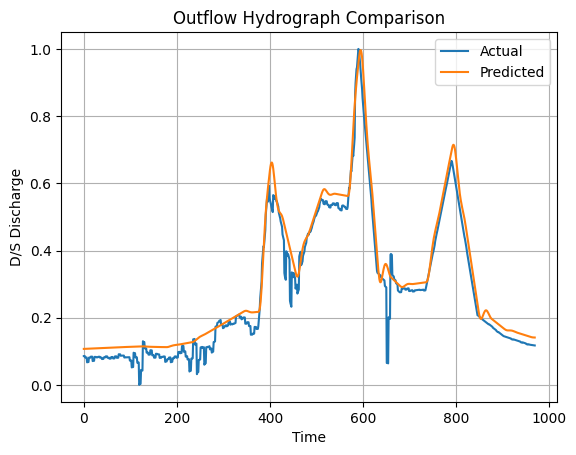

In [119]:
#Plot Y_val vs Y_pred
plt.plot(Y_val, label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('D/S Discharge')
plt.title('Actual vs Predicted D/S Discharge')
plt.title('Outflow Hydrograph Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [122]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_val, Y_pred)
print(r2)

0.9520212499285856
